<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


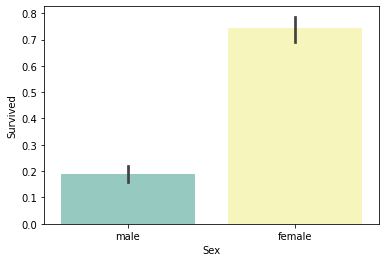

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

train_data = pd.read_csv('./data/train.csv')
test_data = pd.read_csv('./data/test.csv')

test_data['Survived'] = np.nan
df = pd.concat([train_data, test_data], ignore_index=True, sort=False)

# information of df
df.info() 

# The relationship between sex and survival
sns.barplot(x='Sex', y='Survived', data=df, palette='Set3')
plt.show()

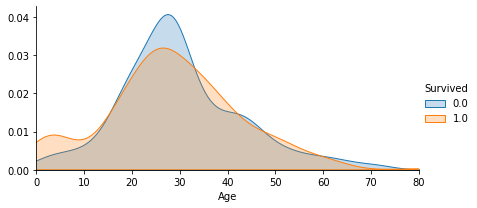

In [2]:
# Age estimated by Random Forest from Pclass, Sex, Parch, SibSp
from sklearn.ensemble import RandomForestRegressor

# Specify the items to be used for estimation
age_df = df[['Age', 'Pclass','Sex','Parch','SibSp']]

# One-hot encoding of label features
age_df = pd.get_dummies(age_df)

# Separate training data from test data and convert to numpy
known_age = age_df[age_df.Age.notnull()].values
unknown_age = age_df[age_df.Age.isnull()].values

# Separate the training data into x, y
x = known_age[:, 1:]
y = known_age[:, 0]

# Build an estimation model with Random Forest
rfr = RandomForestRegressor(random_state=0, n_estimators=100, n_jobs=-1)
rfr.fit(x, y)

# Use the estimation model to predict and complement the Age of the test data
predictedAges = rfr.predict(unknown_age[:, 1::])
df.loc[(df.Age.isnull()), 'Age'] = predictedAges

# Age-specific survival and death curves
facet = sns.FacetGrid(df[0:890], hue="Survived", aspect=2)
facet.map(sns.kdeplot, 'Age', shade=True)
facet.set(xlim=(0, df.loc[0:890,'Age'].max()))
facet.add_legend()
plt.show()

<AxesSubplot:xlabel='Title', ylabel='Survived'>

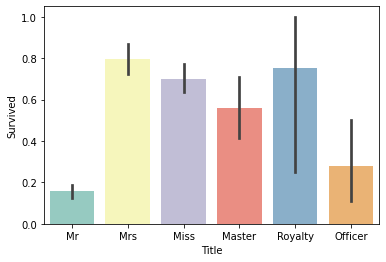

In [3]:
# Extract honorifics (Title) from Name and group them
df['Title'] = df['Name'].map(lambda x: x.split(', ')[1].split('. ')[0])
df['Title'].replace(['Capt', 'Col', 'Major', 'Dr', 'Rev'], 'Officer', inplace=True)
df['Title'].replace(['Don', 'Sir',  'the Countess', 'Lady', 'Dona'], 'Royalty', inplace=True)
df['Title'].replace(['Mme', 'Ms'], 'Mrs', inplace=True)
df['Title'].replace(['Mlle'], 'Miss', inplace=True)
df['Title'].replace(['Jonkheer'], 'Master', inplace=True)
sns.barplot(x='Title', y='Survived', data=df, palette='Set3')
